In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Creating Sine Wave

In [2]:
# we will go from 0 to 50 & we will ask 501 linearly spaced point between 0 to 50

x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x) 

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

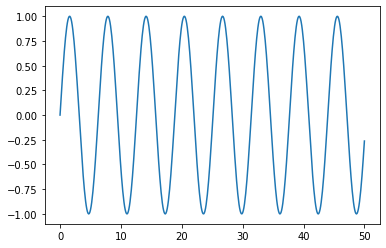

In [6]:
plt.plot(x,y)

In [7]:
# Now we are going to turn this into dataframe
# column Sine = sin of index value


df = pd.DataFrame(data=y,index=x,columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


### Now we will train test split but this in not our usual split

In [8]:
# In this we choose the last % of data to test
print(len(df))
test_percent = 0.1  # % of data which we wanna train

501


In [9]:
# calculating cutoff point

len(df)*test_percent    # 501*0.1 = 50.1

50.1

In [10]:
# From what index point should i have to cutoff

test_point = np.round(len(df)*test_percent)      # np.round = Round figure

In [11]:
test_point

50.0

In [12]:
# the index from where we will split

test_index = int(len(df)-test_point)    # 501 - 50 = 451
test_index

451

In [13]:
train = df.iloc[:test_index]        # 0    to   451
test = df.iloc[test_index:]         # 452  to   501 

In [14]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


### Scalling Data

In [15]:
# The current NN is actually feed output to themself we need to actually scale the y data which is typically a label

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
# Creating Batches

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [18]:
# take training batches & transform them which will make sense

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# length = length of output sequences in number of time steps 
# batch_size = how many batches(time-series samples) are we returning in each batch

length = 50 
batch_size = 1 # in sequence information time series batch_size = 1 works the best

In [20]:
# Now we will create geneator 
# 1.) What is the source of our data essentially what contains x_time_Stand or x index in our case its our "scaled_train"
# 2.) Where is the y_label_contain in our case it is also "scaled_train"
# 3.) Length
# 4.) Batch_size

geneartor = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=length,
                                batch_size=batch_size)

In [21]:
len(scaled_train)

451

In [22]:
len(geneartor)   # generate batches for us    generator = scaled_train - length

401

In [23]:
X,y = geneartor[0]   # X & y which should be predicted

In [24]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [25]:
y

array([[0.02053313]])

### Creating a model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_features = 1

model = Sequential()


# Number of neurons, input_shape
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Since we are using generator we will not use transform insted we will use generator

model.fit_generator(geneartor,epochs=5)

Epoch 1/5
401/401 [==============================] - 33s 83ms/step - loss: 0.0052
Epoch 2/5
401/401 [==============================] - 33s 83ms/step - loss: 3.5220e-04
Epoch 3/5
401/401 [==============================] - 33s 82ms/step - loss: 8.1466e-05
Epoch 4/5
401/401 [==============================] - 32s 81ms/step - loss: 2.4321e-04
Epoch 5/5
401/401 [==============================] - 34s 86ms/step - loss: 1.1579e-04


In [29]:
losses = pd.DataFrame(model.history.history)
losses

,loss
0,0.005243
1,0.000352
2,0.000081
3,0.000243
4,0.000116


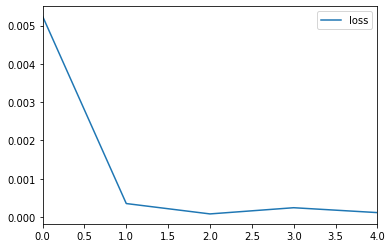

In [30]:
losses.plot()

In [31]:
# Evaluation of our test data

# What should be the first batch i should be passing in to my model to predict something on the test set
first_eval_batch = scaled_train[-length:] # we will be taking last 25 points from our training set to predict 1 point in future 

In [32]:
# Now to pass it to the model we have to reshape
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [33]:
model.predict(first_eval_batch)

array([[0.94390345]], dtype=float32)

In [34]:
scaled_test[0]

array([0.94955134])

In [35]:
# now we have to put this into a for loop 

test_perdictions = [] 
first_eval_batch = scaled_train[-length:]

currnet_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(currnet_batch)[0]
    test_perdictions.append(current_pred)
    currnet_batch = np.append(currnet_batch[:,1:,:],[[current_pred]],axis=1)

In [36]:
#test_perdictions

In [37]:
#scaled_test

In [38]:
true_pred = scaler.inverse_transform(test_perdictions)

In [39]:
#true_pred

In [40]:
test['Predictions'] = true_pred

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


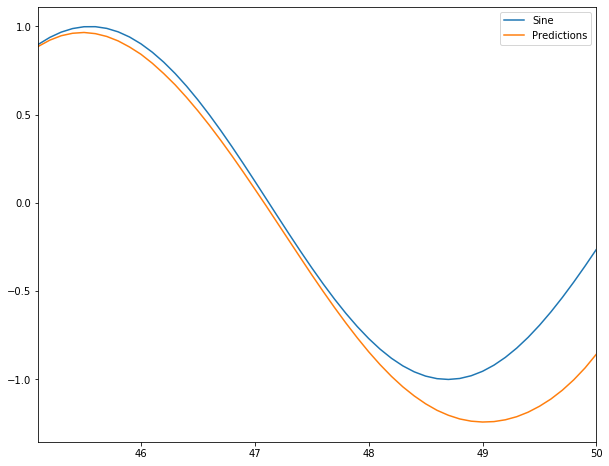

In [41]:
test.plot(figsize=(10,8))

## So let us introduce how we can use early stopping in conjuction with the fact that we are fitting to a generator bcz passing a validation data in our case we have to pass it in same batch shape as a generator doing.
### So we have essentially create 2 generators 1 for trainging & 2nd for testing 

In [42]:
# To do that we have to start with early stopping before

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience = 2)

#### Creating a validation generator

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

#### Error occured bcz : our validation set is looking for exact same length the entierety of our test set, what needs to happend is that this 'scaled_trained' dataset must be greater than the length chosen for our batches  




##### ValueError                                Traceback (most recent call last)
##### <ipython-input-50-469cfbfe13b2> in <module>
    
#####       1 # Creating a validation generator
#####       2 
##### ----> 3 validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

##### D:\Anaconda\lib\site-packages\keras_preprocessing\sequence.py in __init__(self, data, targets, length, sampling_rate, stride, start_index, end_index, shuffle, reverse, batch_size)
#####     353                              'is disallowed, as no part of the sequence '
#####     354                              'would be left to be used as current step.'
##### --> 355                              % (self.start_index, self.end_index))
#####     356 
#####     357     def __len__(self):

##### ValueError: `start_index+length=50 > end_index=49` is disallowed, as no part of the sequence would be left to be used as current step.

In [43]:
# Length cannot be same size of scaled_test data 

length = 49  # should be 1 shotter than test data

generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=length,
                                batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,
                                           scaled_test,
                                           length=length,
                                           batch_size=1)

In [44]:
model = Sequential()

# Number of neurons, input_shape
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [45]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stopping])

Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 16s 40ms/step - loss: 0.0090 - val_loss: 1.9310e-05
Epoch 2/20
402/402 [==============================] - 10s 25ms/step - loss: 3.0540e-04 - val_loss: 9.3232e-07
Epoch 3/20
402/402 [==============================] - 9s 24ms/step - loss: 4.8478e-04 - val_loss: 1.8070e-05
Epoch 4/20
402/402 [==============================] - 10s 24ms/step - loss: 5.3721e-05 - val_loss: 2.1849e-06


In [46]:
test_perdictions = [] 
first_eval_batch = scaled_train[-length:]

currnet_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(currnet_batch)[0]
    test_perdictions.append(current_pred)
    currnet_batch = np.append(currnet_batch[:,1:,:],[[current_pred]],axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


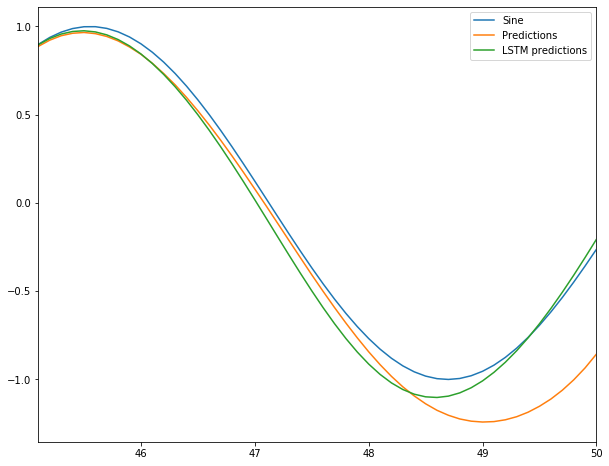

In [47]:
true_predictions = scaler.inverse_transform(test_perdictions)
test['LSTM predictions'] = true_predictions
test.plot(figsize=(10,8))

In [48]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [49]:
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data,
                                length=length,
                                batch_size=1)

In [50]:
model = Sequential()

# Number of neurons, input_shape
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=6)

Epoch 1/6
452/452 [==============================] - 67s 148ms/step - loss: 0.0122
Epoch 2/6
452/452 [==============================] - 66s 147ms/step - loss: 4.5875e-04
Epoch 3/6
452/452 [==============================] - 62s 137ms/step - loss: 4.6301e-04
Epoch 4/6
452/452 [==============================] - 63s 138ms/step - loss: 1.8169e-04
Epoch 5/6
452/452 [==============================] - 66s 145ms/step - loss: 6.9996e-05
Epoch 6/6
452/452 [==============================] - 58s 129ms/step - loss: 8.3308e-05


In [51]:
forcast = [] 
first_eval_batch = scaled_train[-length:]

currnet_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    current_pred = model.predict(currnet_batch)[0]
    forcast.append(current_pred)
    currnet_batch = np.append(currnet_batch[:,1:,:],[[current_pred]],axis=1)

In [52]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [53]:
forcast = scaler.inverse_transform(forcast)
forcast_index = np.arange(50.1,52.6,step=0.1)          # 25*0.1 = 2.5 : 50.1+2.5 = 52.6 
len(forcast_index)

25

In [54]:
len(forcast)

25

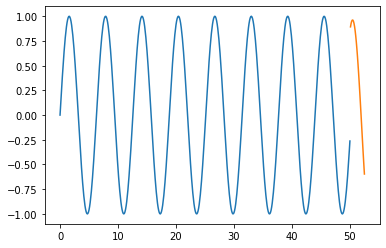

In [55]:
plt.plot(df.index,df['Sine'])
plt.plot(forcast_index,forcast)